In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_NAB_file(fname, folder):
    base = "NAB/results/"
    df = pd.read_csv(base + "NumentaTM/" + folder + "/NumentaTM_" + fname)
    return df#[["timestamp", "value", "label"]]

In [3]:
import glob
NAB = {}
for x in glob.glob("NAB/results/NumentaTM/*/*.csv"):
    f = x.split("\\")[-1].split("numentaTM_")[-1]
    fo = x.split("\\")[1]
    NAB[f"{fo}/{f}"] = read_NAB_file(f, fo)    
sum([f.shape[0] for _,f in NAB.items()])

365558

In [11]:
df = NAB["artificialNoAnomaly/art_daily_perfect_square_wave.csv"]
df["timestamp"] = pd.to_datetime(df["timestamp"])
print(df)

               timestamp  value  anomaly_score  raw_score  label  \
0    2014-04-01 00:00:00   20.0       0.030103        1.0      0   
1    2014-04-01 00:05:00   20.0       0.030103        1.0      0   
2    2014-04-01 00:10:00   20.0       0.030103        1.0      0   
3    2014-04-01 00:15:00   20.0       0.030103        1.0      0   
4    2014-04-01 00:20:00   20.0       0.030103        1.0      0   
...                  ...    ...            ...        ...    ...   
4027 2014-04-14 23:35:00   20.0       0.008627        0.0      0   
4028 2014-04-14 23:40:00   20.0       0.008627        0.0      0   
4029 2014-04-14 23:45:00   20.0       0.008627        0.0      0   
4030 2014-04-14 23:50:00   20.0       0.008627        0.0      0   
4031 2014-04-14 23:55:00   20.0       0.008627        0.0      0   

      S(t)_reward_low_FP_rate  S(t)_reward_low_FN_rate  S(t)_standard  
0                           0                        0              0  
1                           0          

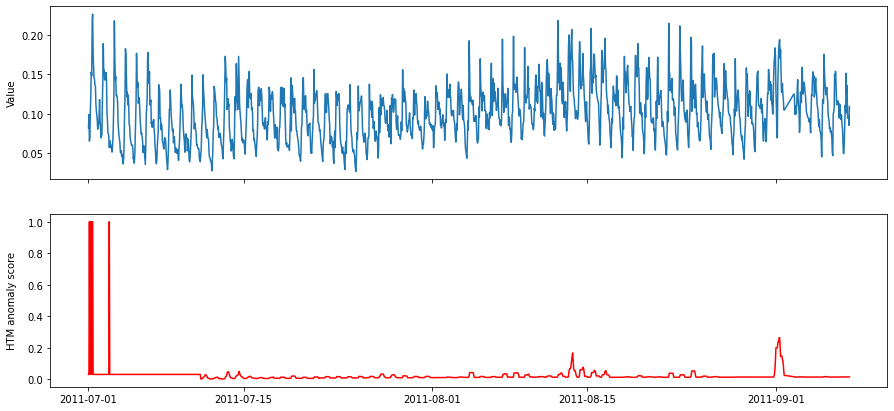

In [11]:
df = NAB['realAdExchange/exchange-2_cpc_results.csv']
df["timestamp"] = pd.to_datetime(df["timestamp"])
fig, ax = plt.subplots(2, sharex=True, figsize=(15,7))
ax[0].plot(df["timestamp"], df["value"])
ax[0].set_ylabel("Value")
ax[1].plot(df["timestamp"], df["anomaly_score"], "red")
ax[1].set_ylabel("HTM anomaly score")
fig.align_ylabels(ax)

In [5]:
preds_predonly = {}    
preds_nopred = {}
preds_allcol = {}
for x in glob.glob("NAB/results/NumentaTM/*/*.csv"):
    f = x.split("\\")[-1].split("numentaTM_")[-1]
    fo = x.split("\\")[1]
    preds_predonly[f"{fo}/{f}"] = pd.read_csv(f"data_results/SlidingEnsemble/{fo}/{f[:-4]}_pred_onlypred.csv")
    preds_nopred[f"{fo}/{f}"] = pd.read_csv(f"data_results/SlidingEnsemble/{fo}/{f[:-4]}_pred_nopred.csv")
    preds_allcol[f"{fo}/{f}"] = pd.read_csv(f"data_results/SlidingEnsemble/{fo}/{f[:-4]}_pred_all.csv")

In [18]:
for k,d in NAB.items():
    d["anomaly_score"] = 0
    plt.plot(d["value"])
    plt.twinx().plot(d["label"], "orange")
    n = k.replace("/", "")[:-4]
    plt.savefig(f"data_plots/NAB/{n}_gt.png")
    plt.close()
    
    d["anomaly_score"][44:] = preds_predonly[k]["Score.1"]
    plt.plot(d["value"])
    plt.twinx().plot(d["anomaly_score"], "orange")
    n = k.replace("/", "")[:-4]
    plt.savefig(f"data_plots/NAB/{n}_predonly.png")
    plt.close()
    d.to_csv(f"NAB/results/SlidingPredOnly/{k.split('/')[0]}/SlidingPredOnly_{k.split('/')[1]}")
    
    d["anomaly_score"][44:] = preds_nopred[k]["Score.1"]
    plt.plot(d["value"])
    plt.twinx().plot(d["anomaly_score"], "orange")
    n = k.replace("/", "")[:-4]
    plt.savefig(f"data_plots/NAB/{n}_nopred.png")
    plt.close()
    d.to_csv(f"NAB/results/SlidingNoPred/{k.split('/')[0]}/SlidingNoPred_{k.split('/')[1]}")
    
    d["anomaly_score"][44:] = preds_allcol[k]["Score.1"]
    plt.plot(d["value"])
    plt.twinx().plot(d["anomaly_score"], "orange")
    n = k.replace("/", "")[:-4]
    plt.savefig(f"data_plots/NAB/{n}_full.png")
    plt.close()
    d.to_csv(f"NAB/results/SlidingFull/{k.split('/')[0]}/SlidingFull_{k.split('/')[1]}")
    

<ipython-input-18-ec8c976eaded>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["anomaly_score"][44:] = preds_predonly[k]["Score.1"]
<ipython-input-18-ec8c976eaded>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["anomaly_score"][44:] = preds_nopred[k]["Score.1"]
<ipython-input-18-ec8c976eaded>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["anomaly_score"][44:] = preds_allcol[k]["Score.1"]


In [13]:
for k,d in NAB.items():
    print(k.split("/"))

['artificialNoAnomaly', 'art_daily_no_noise.csv']
['artificialNoAnomaly', 'art_daily_perfect_square_wave.csv']
['artificialNoAnomaly', 'art_daily_small_noise.csv']
['artificialNoAnomaly', 'art_flatline.csv']
['artificialNoAnomaly', 'art_noisy.csv']
['artificialWithAnomaly', 'art_daily_flatmiddle.csv']
['artificialWithAnomaly', 'art_daily_jumpsdown.csv']
['artificialWithAnomaly', 'art_daily_jumpsup.csv']
['artificialWithAnomaly', 'art_daily_nojump.csv']
['artificialWithAnomaly', 'art_increase_spike_density.csv']
['artificialWithAnomaly', 'art_load_balancer_spikes.csv']
['realAdExchange', 'exchange-2_cpc_results.csv']
['realAdExchange', 'exchange-2_cpm_results.csv']
['realAdExchange', 'exchange-3_cpc_results.csv']
['realAdExchange', 'exchange-3_cpm_results.csv']
['realAdExchange', 'exchange-4_cpc_results.csv']
['realAdExchange', 'exchange-4_cpm_results.csv']
['realAWSCloudwatch', 'ec2_cpu_utilization_24ae8d.csv']
['realAWSCloudwatch', 'ec2_cpu_utilization_53ea38.csv']
['realAWSCloudwatch

In [149]:
for k,d in NAB.items():    
    d["value"] = (d["value"] - d["value"].min()) / (d["value"].max() - d["value"].min())

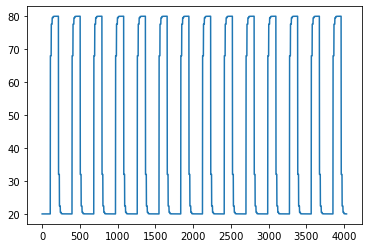

In [5]:
plt.plot(NAB["artificialNoAnomaly/art_daily_no_noise.csv"]["value"])

In [151]:
import pandas as pd
import numpy as np
import time
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend

def tsToSupervised(ts, lag_size, step_out):
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(lag_size, 0, -1):
        cols.append(ts.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, step_out):
        cols.append(ts.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    
    return agg.values

def model_predict(model, history, lag_size):
    x_input = np.array(history[-lag_size:]).reshape((1, lag_size, 1))
    yhat = model.predict(x_input, verbose=0)
    return yhat[0]

def drawTimeSeries(originalData, predictedData, outputdirname, length):
    DirName = outputdirname
    isDir = os.path.isdir(DirName)
    if not isDir:
        os.makedirs(DirName)
    name = "Forecasted Signal"
    plt.figure(figsize=(15, 5))
    plt.xlabel('time')
    plt.ylabel('Response value')
    plt.title(name)
    #length = len(originalData)
    # plt.plot(np.arange(len(originalData)), originalData[:-length], color='blue', linestyle="-", label="original")
    # plt.plot(np.arange(0, len(predictedData)), predictedData[:-length], color='red', linestyle="-", label="observed")
    plt.plot(np.arange(length), originalData[:length], color='blue', linestyle="-", label="original")
    plt.plot(np.arange(0, length), predictedData[:length], color='red', linestyle="-", label="predicted")
    plt.legend()
    plt.grid(True)
    plt.savefig(DirName + "/" + name + ".png")
    plt.close()

def getXtrainYtrain(data, lag_size, step_out):
    train_x, train_y = data[:, :lag_size], data[:, lag_size:]
    return train_x, train_y

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

def fitRegressor(X_train, y_train, epochs, units, dir):
    isDir = os.path.isdir(dir)
    if not isDir:
        os.makedirs(dir)
    n_features = 1
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    regressor = Sequential()
    # WARNING: Maybe i neet to change to input_shape = (lag_size, 1)
    regressor.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
    times = TimeHistory()
    history = regressor.fit(X_train, y_train,validation_split=0.2, epochs=epochs, batch_size=128, callbacks=[times])
    training_time=sum(times.times)

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['test', 'test'], loc='upper left')
    plt.savefig(dir +"loss.png")

    plt.clf()

    plt.plot(history.history['rmse'])
    plt.plot(history.history['val_rmse'])
    plt.title('model rmse')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['test','test'], loc='upper left')
    plt.savefig(dir + "rmse.png")

    #numpy.savetxt("loss_history.txt", history, delimiter=",")

    return regressor, training_time

In [16]:
yahoos = []
for i in range(1, 68):
    d = pd.read_csv(f"data/Yahoo/real_{i}.csv")
    d["value"] = (d["value"] - d["value"].min()) / (d["value"].max() - d["value"].min())
    yahoos.append(d)    

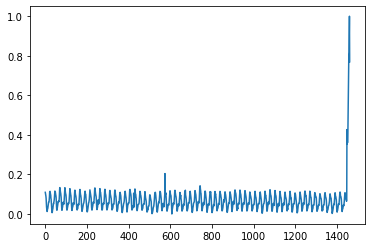

In [17]:
plt.plot(yahoos[2]["value"])

In [171]:
lookback = 200
predictahead = 10
datas = []
for d in yahoos:
    datas.append(tsToSupervised(d["value"], lookback, predictahead))
dataset = np.vstack(datas)
train_x, train_y = getXtrainYtrain(dataset, lookback, predictahead)

In [172]:
train_x.shape

(80863, 200)

In [ ]:
regressor, training_time = fitRegressor(train_x, train_y, 4, 160, "lstm_training")

In [167]:
test = NAB["artificialNoAnomaly/art_daily_no_noise.csv"]["value"]

In [169]:
nab_predictions = {}
for k,d in NAB.items(): 
    print(k)
    test_x, test_y = getXtrainYtrain(tsToSupervised(d["value"], lookback, predictahead), lookback, predictahead)
    nab_predictions[k] = regressor.predict_on_batch(test_x.reshape((test_x.shape[0], test_x.shape[1], 1)))

artificialNoAnomaly/art_daily_no_noise.csv
artificialNoAnomaly/art_daily_perfect_square_wave.csv
artificialNoAnomaly/art_daily_small_noise.csv
artificialNoAnomaly/art_flatline.csv
artificialNoAnomaly/art_noisy.csv
artificialWithAnomaly/art_daily_flatmiddle.csv
artificialWithAnomaly/art_daily_jumpsdown.csv
artificialWithAnomaly/art_daily_jumpsup.csv
artificialWithAnomaly/art_daily_nojump.csv
artificialWithAnomaly/art_increase_spike_density.csv
artificialWithAnomaly/art_load_balancer_spikes.csv
realAdExchange/exchange-2_cpc_results.csv
realAdExchange/exchange-2_cpm_results.csv
realAdExchange/exchange-3_cpc_results.csv
realAdExchange/exchange-3_cpm_results.csv
realAdExchange/exchange-4_cpc_results.csv
realAdExchange/exchange-4_cpm_results.csv
realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv
realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv
realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv
realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv
realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv
realA

In [170]:
for k,d in NAB.items():
    if nab_predictions[k].shape[0] == 0:
        continue
    plt.plot(d["value"][lookback:-1*(predictahead - 1)].values)
    val = d["value"][lookback:-1*(predictahead - 1)].values.reshape((-1, 1))
    pred = np.vstack(nab_predictions[k])
    plt.plot(np.abs(pred - val), "orange")    
    n = k.replace("/", "")[:-4]
    plt.savefig(f"data_plots/NAB/{n}_lstmerror.png")
    plt.close()    

In [18]:
yahoos = []
for i in range(1, 68):
    d = pd.read_csv(f"data/Yahoo/real_{i}.csv")
    yahoos.append(d)    

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
import numpy as np

yahoo_ARMAs = []
for yahoo in yahoos:
    print("Starting New Yahoo")
    data = yahoo["value"].values
    predictions = []
    for i in range(100, data.shape[0]):
        train = data[i - 100: i]
        model = ARIMA(train, order=(2, 0, 1))
        try:
            predictions.append(model.fit().predict(100, 100))
        except:
            predictions.append(train[-1])
    yahoo_ARMAs.append(np.vstack(predictions))
    break

Starting New Yahoo


c:\erebere\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\erebere\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood op

c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Chec

c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\erebere\env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Chec

In [72]:
anom_len = 3
for i in range(len(yahoos)):
    yahoos[i]["is_anomaly"] = yahoos[i]["is_anomaly"].shift(-1 * (anom_len - 1)).rolling(anom_len).max().fillna(0)    

In [81]:
i = 0
for yahoo in yahoos:
    data = yahoo["value"].values
    preds = yahoo_ARMAs[i]
    plt.plot(data[100:])
    dif = pd.Series(np.abs(data[100:].reshape((-1, 1)) - preds)[:,0])
    z = np.abs(dif - dif.rolling(50).mean()) / dif.rolling(50).std()
    plt.twinx().plot(z,"orange")
    plt.savefig(f"data_plots/Yahoo_ARMA/{i}_z.png")
    plt.close()
    i += 1

Text(0.5, 0, 'Timesteps')

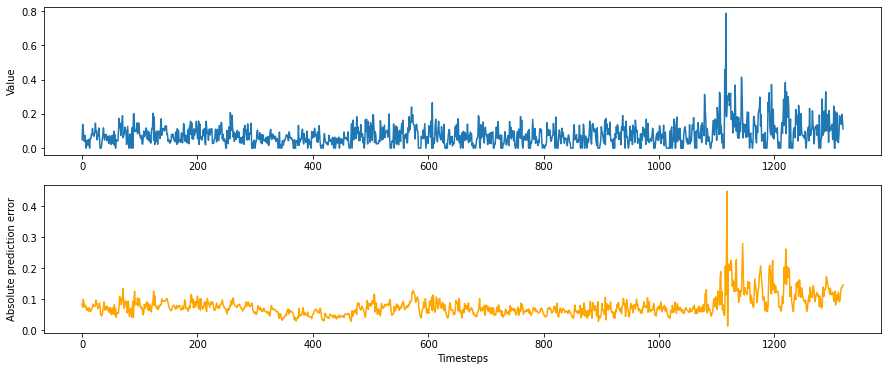

In [26]:
fig, axs = plt.subplots(2, figsize=(15, 6))
axs[0].plot(yahoos[0]["value"].values[100:])
axs[1].plot(yahoo_ARMAs[0], 'orange')
axs[0].set_ylabel("Value")
axs[1].set_ylabel("Absolute prediction error")
axs[1].set_xlabel("Timesteps")